In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

In [ ]:
%cd /content/drive/My Drive/Kaggle

/content/drive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

brain-mri-images-for-brain-tumor-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# !unzip \*.zip  && rm *.zip

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


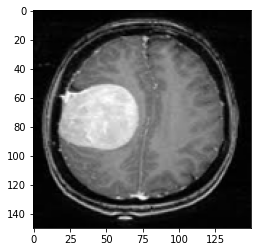

In [ ]:
import cv2

base_dir = os.path.join("brain_tumor_dataset/train")
training_data = []

for i in os.listdir(base_dir):
  path = os.path.join(base_dir, i)
  for j in os.listdir(path):
    img = cv2.imread(os.path.join(path, j))
    new = cv2.resize(img, (150,150))
    show = plt.imshow(new)
    break

In [ ]:
training_data = []

for i in os.listdir(base_dir):
  path = os.path.join(base_dir, i)
  if i == "no":
    label = 0
  else:
    label = 1
  for j in os.listdir(path):
    img = cv2.imread(os.path.join(path, j), cv2.IMREAD_GRAYSCALE)
    new = cv2.resize(img, (150,150))
    training_data.append([new, label])

In [ ]:
len(training_data)

240

In [ ]:
from random import shuffle

shuffle(training_data)

for i in training_data[:10]:
  print(i[1])

0
1
1
1
1
1
1
1
0
0


In [ ]:
features = []
labels = []

for feature, label in training_data:
  features.append(feature)
  labels.append(label)

In [ ]:
print(labels.count(0))
print(labels.count(1))

92
148


In [ ]:
# reshaping agar semula 150,150 menjadi 150,150,1 dan (-1) di situ artinya agar dimensi awal 253-nya auto diketahui sama numpy nya
features = np.array(features).reshape(-1, 150,150,1)

In [ ]:
# normalisasi
features = features/255.0

In [ ]:
features.shape

(240, 150, 150, 1)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(150,150,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(256, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 64)      640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 73984)            

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("accuracy")>0.99):
            print(" Reached 99% Accuracy")
            self.model.stop_training = True

callbacks = myCallback()

# uncheck this if model fit doesn't run
labels = np.array(labels)

In [ ]:
from time import time
t1 = time()
model.fit(features, labels, validation_split=0.2, epochs=30, callbacks=[callbacks])

Epoch 1/30
6/6 [==============================] - 19s 3s/step - loss: 0.6968 - accuracy: 0.6198 - val_loss: 0.4712 - val_accuracy: 0.8333
Epoch 2/30
6/6 [==============================] - 19s 3s/step - loss: 0.5375 - accuracy: 0.7448 - val_loss: 0.4394 - val_accuracy: 0.7708
Epoch 3/30
6/6 [==============================] - 19s 3s/step - loss: 0.5168 - accuracy: 0.7604 - val_loss: 0.4111 - val_accuracy: 0.8333
Epoch 4/30
6/6 [==============================] - 19s 3s/step - loss: 0.4454 - accuracy: 0.8021 - val_loss: 0.3665 - val_accuracy: 0.8750
Epoch 5/30
6/6 [==============================] - 19s 3s/step - loss: 0.3959 - accuracy: 0.8229 - val_loss: 0.3513 - val_accuracy: 0.8958
Epoch 6/30
6/6 [==============================] - 19s 3s/step - loss: 0.3245 - accuracy: 0.8698 - val_loss: 0.3452 - val_accuracy: 0.8542
Epoch 7/30
6/6 [==============================] - 19s 3s/step - loss: 0.2766 - accuracy: 0.8750 - val_loss: 0.2722 - val_accuracy: 0.8750
Epoch 8/30
6/6 [==================

In [ ]:
print(f"Training time: {round(time()-t1)} second")

Training time: 334 second


In [ ]:
from tensorflow.keras.preprocessing import image

validation_base_dir = os.path.join("brain_tumor_dataset/Validation")

# dibawah ini nama nya hanya perumpamaan saja
y_test = []
pred = []

for i in os.listdir(validation_base_dir):
  path = os.path.join(validation_base_dir, i)

  for j in os.listdir(path):

    if i == "yes":
      y_test.append(1)
    else:
      y_test.append(0)

    img = image.load_img(os.path.join(path, j), target_size=(150,150), color_mode = "grayscale")
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x/255.0

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    result = []
    
    if classes > 0.5:
        temp = "From validation folder: " + i + " -> Positif Brain Tumor"
        kelas = 1
        pred.append(kelas)

    else:
        temp = "From validation folder: " + i + " -> Negatif Brain Tumor"
        kelas = 0
        pred.append(kelas)
    
    result.append(temp)
    print(result)


['From validation folder: yes -> Positif Brain Tumor']
['From validation folder: yes -> Positif Brain Tumor']
['From validation folder: yes -> Positif Brain Tumor']
['From validation folder: yes -> Positif Brain Tumor']
['From validation folder: yes -> Positif Brain Tumor']
['From validation folder: yes -> Positif Brain Tumor']
['From validation folder: yes -> Positif Brain Tumor']
['From validation folder: no -> Negatif Brain Tumor']
['From validation folder: no -> Negatif Brain Tumor']
['From validation folder: no -> Negatif Brain Tumor']
['From validation folder: no -> Negatif Brain Tumor']
['From validation folder: no -> Negatif Brain Tumor']
['From validation folder: no -> Negatif Brain Tumor']


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pred)
print(f"Accuracy validation: {round(accuracy*100,2)} %")

Accuracy validation: 100.0 %
